# Рахель Марк БПМ 161
# Лабораторная работа №3
# Вариант 19
# № 3.1.19

Дана система уравнений $Ax=b$ порядка $n$. Исследовать зависимость погрешности решения $x$ от погрешностей правой части системы $b$ 
$a_{ij}=\frac{100}{(11+c_{ij})^5}$

In [1]:
import numpy as np
import matplotlib.pyplot as plt
np.set_printoptions(linewidth=100)

In [2]:
n = 5
N = 19
A = np.ones([n,n])
for i in range(n):
    for j in range(n):
        A[i][j] = 100/(11+0.1*N*i*j)**5
print(A)
b = [N for j in range (n)]
print(b)

[[6.20921323e-04 6.20921323e-04 6.20921323e-04 6.20921323e-04 6.20921323e-04]
 [6.20921323e-04 2.79931292e-04 1.40828782e-04 7.69870439e-05 4.49195378e-05]
 [6.20921323e-04 1.40828782e-04 4.49195378e-05 1.77320892e-05 8.10015899e-06]
 [6.20921323e-04 7.69870439e-05 1.77320892e-05 5.70779544e-06 2.26681720e-06]
 [6.20921323e-04 4.49195378e-05 8.10015899e-06 2.26681720e-06 8.22239421e-07]]
[19, 19, 19, 19, 19]


Решаем систему

In [3]:
x = np.linalg.solve(A,b)
print(x)

[ 3.05996900e+04  9.13940942e-13 -1.02850290e-11  3.22920187e-11 -2.86306902e-11]


Находим число обусловленности

In [4]:
cond = np.linalg.cond(A)
print(cond)

12263.523128206121


Вычисляем вектор относительных погрешностей решений систем

In [5]:
delta = 10**(-6)
d = []

for i in range(n):
    b_d = b
    b_d[i] += delta
    x_d = np.linalg.solve(A, b_d)
    d.append(np.max(x - x_d)/np.max(x))
    
d = np.array(d).reshape(n,1)
print(d)

[[2.97042069e-07]
 [7.40179969e-06]
 [6.59537776e-05]
 [4.55340682e-05]
 [0.00000000e+00]]


Определяем компоненту, имеющую наибольшее влияние на погрешность решения

In [6]:
print(np.argmax(d), b[np.argmax(d)])

2 19.000001


Находим погрешности

In [7]:
print("Теоретическая погрешность <", round(cond*delta, 4))
print("Практическая погрешность =", float(d[np.argmax(d)].round(4)))

Теоретическая погрешность < 0.0123
Практическая погрешность = 0.0001


Теоретическая погрешность больше практической, т.к. является лишь оценкой

# № 3.3.5

Найти число обусловленности матрицы $A$, используя вычислительный эксперимент

Задаем матрицу

In [8]:
A = np.ones([5,5])
for i in range(5):
    for j in range (5):
        A[i,j] = (i+1)**(4-j)
print(A)

[[  1.   1.   1.   1.   1.]
 [ 16.   8.   4.   2.   1.]
 [ 81.  27.   9.   3.   1.]
 [256.  64.  16.   4.   1.]
 [625. 125.  25.   5.   1.]]


Выбираем линейнонезависимые вектора вида $b_1 = (1,0,0,0,0), ... ,b_5=(0,0,0,0,1)$ и решаем систему с этими векторами в правой части

In [9]:
sol = []
for i in range(5):
    tmp = np.zeros(5)
    tmp[i] = 1
    sol.append(np.linalg.solve(A,tmp))
sol = np.array(sol)
#print(sol)

Для каждого из решений вычисляем отношение нормы решения к норме вектора правой части

In [10]:
ratio = []
for i in sol:
    ratio.append(np.sqrt(np.sum(i**2)))
print(ratio)

[8.67567640654681, 22.791323885295924, 25.285865616980995, 13.35830993967616, 2.764482069233114]


Затем находим норму обратной матрицы

In [11]:
norm_rev = np.max(np.array(ratio))
print(norm_rev)

25.285865616980995


И норму исходной матрицы

In [12]:
Anorm = []
for i in range(n):
    tmp = np.zeros(n)
    tmp[i] = 1
    Anorm.append(np.sqrt(np.sum((np.dot(A,np.array(tmp)))**2)))
                      
norm = np.max(np.array(Anorm))
print(norm)

680.4256021050354


Получаем число обусловленности

In [13]:
cond = norm*norm_rev
print(cond)

17205.150337181305


# №3.7

Исследовать зависимость числа обусловленности матрицы $A$ задачи 3.1 от порядка $n$ матрицы

Реализуем $LU$-разложение

In [14]:
def pivot_matrix(M):
    m = len(M)
    id_mat = [[float(i ==j) for i in range(m)] for j in range(m)]
    for j in range(m):
        row = max(range(j, m), key=lambda i: abs(M[i][j]))
        if j != row:
            id_mat[j], id_mat[row] = id_mat[row], id_mat[j]
    return np.array(id_mat)

In [15]:
def plu(A):
    m = len(A)
    L = [[0.0] * m for i in range(m)]
    U = [[0.0] * m for i in range(m)]
    P = pivot_matrix(A)
    P.reshape(m,m)
    PA = P@A
    for j in range(m):
        L[j][j] = 1.
        for i in range(j+1):
            s1 = sum(U[k][j] * L[i][k] for k in range(i))
            U[i][j] = PA[i][j] - s1
        for i in range(j, m):
            s2 = sum(U[k][j] * L[i][k] for k in range(j))
            L[i][j] = (PA[i][j] - s2) / U[j][j]
    return (P, L, U)

Проверим его на примере

In [16]:
test = np.array([[7, 4, 6], [-2, 5, 1], [6, 6, -2]])
print('Test:','\n', test)

p_test, l_test, u_test = plu(test)
print('P:', '\n', np.array(p_test))
print('L:', '\n', np.array(l_test))
print('U:', '\n', np.array(u_test))
print('PA:', '\n', np.dot(l_test, u_test))
print('P:(-1)*L*U:', '\n',np.dot(np.linalg.inv(p_test),np.dot(l_test,u_test)))

Test: 
 [[ 7  4  6]
 [-2  5  1]
 [ 6  6 -2]]
P: 
 [[1. 0. 0.]
 [0. 0. 1.]
 [0. 1. 0.]]
L: 
 [[ 1.          0.          0.        ]
 [ 0.85714286  1.          0.        ]
 [-0.28571429  2.38888889  1.        ]]
U: 
 [[ 7.          4.          6.        ]
 [ 0.          2.57142857 -7.14285714]
 [ 0.          0.         19.77777778]]
PA: 
 [[ 7.  4.  6.]
 [ 6.  6. -2.]
 [-2.  5.  1.]]
P:(-1)*L*U: 
 [[ 7.  4.  6.]
 [-2.  5.  1.]
 [ 6.  6. -2.]]


Функция решения системы уравнений с помощью $LU$-разложения

In [17]:
def sol_lu(matrix, b):
    P, L, U = plu(matrix)
    b_gauss = np.linalg.inv(L)@P@b
    return np.linalg.solve(U, b_gauss)

Функция построения обратной матрицы

In [18]:
def Inverse(matrix, n):
    inverse = []
    ide = np.diag([1.0]*n)
    try:
        for line in ide:
            inverse.append(sol_lu(matrix, line))
    except np.linalg.LinAlgError:
        print('Singular matrix... Can not handle it')
    return np.array(inverse).transpose()

Проверка этой функции

In [19]:
test = np.array([[4, 5, 6], [-23, 23, 0], [0, 0, 1]])

In [20]:
a = Inverse(test, 3)
a

array([[ 0.11111111, -0.02415459, -0.66666667],
       [ 0.11111111,  0.01932367, -0.66666667],
       [ 0.        ,  0.        ,  1.        ]])

In [21]:
b = np.linalg.inv(test)
b

array([[ 0.11111111, -0.02415459, -0.66666667],
       [ 0.11111111,  0.01932367, -0.66666667],
       [ 0.        ,  0.        ,  1.        ]])

Функция создания матрицы в зависимости от ее размера

In [22]:
def create(n):
    A = np.ones([n,n])
    for i in range(n):
        for j in range(n):
            A[i,j] = 100/(11+0.1*N*i*j)**5
    return A

Находим числа обусловленности

In [23]:
all_cond = []
for j in range(1,n+1):
    all_cond.append(np.linalg.cond(create(j)))
all_cond

[1.0,
 5.656115589779908,
 39.06184661686761,
 497.90323757278264,
 12263.523128206121]

Строим график

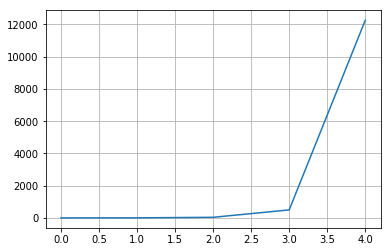

In [24]:
plt.plot(all_cond)
plt.grid()
plt.show()   